# Exercise - Network for Logic Gate OR

Goal: Implement a simple network to simulate logic gate OR

- Use binary inputs (0, 1)



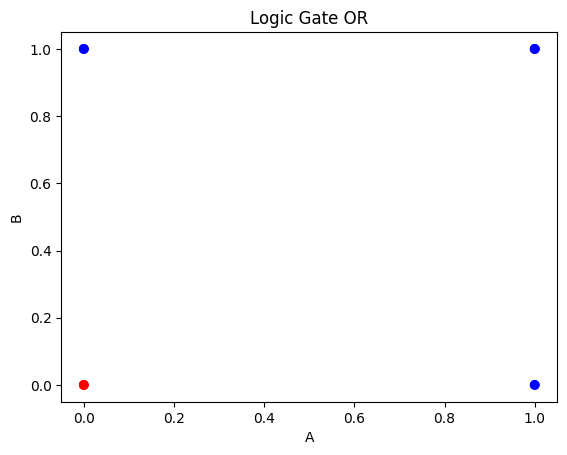

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

x = np.array([[0, 0], 
     [1, 0], 
     [0, 1], 
     [1, 1],
     [0, 0],
     [1, 0], 
     [0, 1], 
     [1, 1],
     [0, 0], 
     [0, 1], 
     [1, 1]])

y = np.array([0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1])

colors = ['blue' if label == 1 else 'red' for label in y]

plt.scatter(x[:,0], x[:, 1] , c=colors)
plt.xlabel("A")
plt.ylabel("B")
plt.title("Logic Gate OR")
plt.show()

In [2]:
inputs = keras.Input(shape=(2,), name="inputLayer")
outputs = layers.Dense(1, activation="sigmoid", name="output")(inputs)
model = keras.Model(inputs=inputs, outputs=outputs, name="OR_Network")
model.summary()

Model: "OR_Network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (InputLayer)     [(None, 2)]               0         
                                                                 
 output (Dense)              (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [3]:
optimizer = Adam(learning_rate=0.1)
model.compile(optimizer=optimizer,
               loss="binary_crossentropy",
               metrics=["accuracy"])

history = model.fit(x=x, y=y, epochs=30)



Epoch 1/30
1/1 [==============================] - 0s 367ms/step - loss: 0.7125 - accuracy: 0.5455
Epoch 2/30
1/1 [==============================] - 0s 5ms/step - loss: 0.6430 - accuracy: 0.5455
Epoch 3/30
1/1 [==============================] - 0s 9ms/step - loss: 0.5851 - accuracy: 0.7273
Epoch 4/30
1/1 [==============================] - 0s 9ms/step - loss: 0.5384 - accuracy: 0.7273
Epoch 5/30
1/1 [==============================] - 0s 12ms/step - loss: 0.5020 - accuracy: 0.7273
Epoch 6/30
1/1 [==============================] - 0s 11ms/step - loss: 0.4743 - accuracy: 0.7273
Epoch 7/30
1/1 [==============================] - 0s 9ms/step - loss: 0.4537 - accuracy: 0.7273
Epoch 8/30
1/1 [==============================] - 0s 7ms/step - loss: 0.4385 - accuracy: 0.7273
Epoch 9/30
1/1 [==============================] - 0s 8ms/step - loss: 0.4268 - accuracy: 0.7273
Epoch 10/30
1/1 [==============================] - 0s 8ms/step - loss: 0.4174 - accuracy: 0.7273
Epoch 11/30
1/1 [==================

Weights Vector:
 [[1.8559448]
 [2.218811 ]] 
 Bias: 
 [-0.341088]


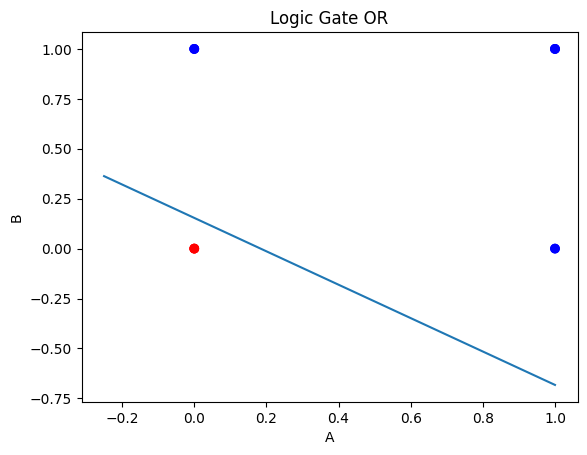

In [4]:
weights = model.layers[1].get_weights()

print(f"Weights Vector:\n {weights[0]} \n Bias: \n {weights[1]}")

x_1 = np.linspace(-0.25, 1, 100)
x_2 = -(x_1 * weights[0][0] + weights[1][0])/(weights[0][1])

plt.plot(x_1, x_2)
plt.scatter(x[:,0], x[:, 1] , c=colors)
plt.xlabel("A")
plt.ylabel("B")
plt.title("Logic Gate OR")
plt.show()


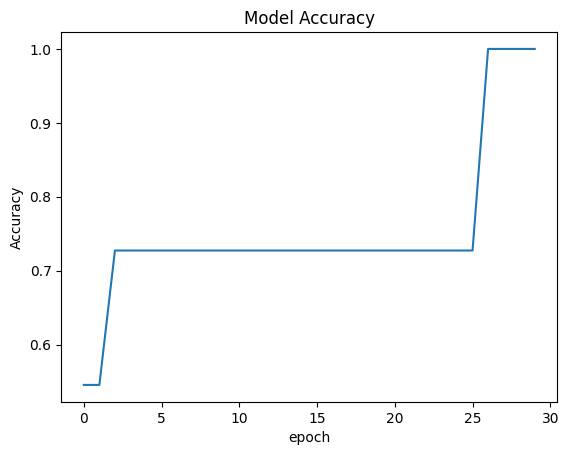

In [5]:
plt.plot(history.history["accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.show()

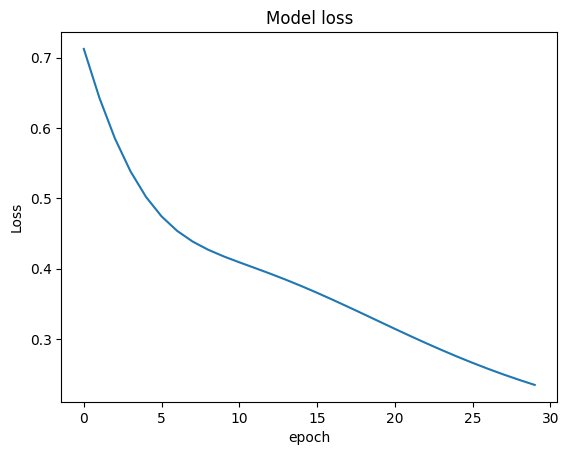

In [6]:
plt.plot(history.history["loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("epoch")
plt.show()

In [7]:
xTest = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])

yPred = model.predict(x=xTest)

print(f"yPred Probabilite to be 1: \n {yPred}")

yPred = np.round(yPred)

print(f"yPred = \n {yPred}")

1/1 [==============================] - 0s 48ms/step
yPred Probabilite to be 1: 
 [[0.4155452]
 [0.8673494]
 [0.8197799]
 [0.9766531]]
yPred = 
 [[0.]
 [1.]
 [1.]
 [1.]]
